<a href="https://colab.research.google.com/github/dietadestina/AI4Jobs_program/blob/main/Salinan_dari_ML_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML-3 Classification using Decision Tree

# Import Library

In [ ]:
# Tulis di sini
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder


# Load dataset


In [ ]:
# Tulis di sini
df = sns.load_dataset("penguins")
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [ ]:
# Tulis di sini
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
print("Missing values:", df.isna().sum())

# Drop rows with missing values
df.dropna(inplace=True)
df.head()

Missing values: species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [ ]:
print(df['species'].unique())
print(df['island'].unique())

['Adelie' 'Chinstrap' 'Gentoo']
['Torgersen' 'Biscoe' 'Dream']


In [ ]:
species = {'Adelie':0, 'Chinstrap':1, 'Gentoo':2}
island = {'Torgersen':0, 'Biscoe':1, 'Dream':2}
sex = {'Male':0, 'Female':1}

df['species'] = df['species'].map(species)
df['island'] = df['island'].map(island)
df['sex'] = df['sex'].map(sex)
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,0,39.1,18.7,181.0,3750.0,0
1,0,0,39.5,17.4,186.0,3800.0,1
2,0,0,40.3,18.0,195.0,3250.0,1
4,0,0,36.7,19.3,193.0,3450.0,1
5,0,0,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...,...,...
338,2,1,47.2,13.7,214.0,4925.0,1
340,2,1,46.8,14.3,215.0,4850.0,1
341,2,1,50.4,15.7,222.0,5750.0,0
342,2,1,45.2,14.8,212.0,5200.0,1


# Data Exploration

In [ ]:
# Tulis di sini
X = df.iloc[:, 1:].values
Y = df.iloc[:, 0].values

In [ ]:
# Tulis di sini
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

---

# Modeling

In [ ]:
# Tulis di sini
model_default = DecisionTreeClassifier()
model_default = model_default.fit(X_train, y_train)

model_DT = DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=4, random_state=25)
model_DT = model_DT.fit(X_train, y_train)

---

# Evaluation

**Mengevaluasi Performa Model dengan Hyperparameter Default**

In [ ]:
# Tulis di sini
#hasil prediksi training set
y_pred_train_default = model_default.predict(X_train)

#hasil prediksi test set
y_pred_default = model_default.predict(X_test)

#Train set score
print("Train Accuracy :", metrics.accuracy_score(y_train, y_pred_train_default))
print("Train Precission :", metrics.accuracy_score(y_train, y_pred_train_default))
print("Train Recall :", metrics.accuracy_score(y_train, y_pred_train_default), '\n')

#Test set score
print("Test Accuracy :",metrics.accuracy_score(y_test, y_pred_default))
print("Test Precission :", metrics.accuracy_score(y_test, y_pred_default))
print("Test Recall :",metrics.accuracy_score(y_test, y_pred_default))

Train Accuracy : 1.0
Train Precission : 1.0
Train Recall : 1.0 

Test Accuracy : 1.0
Test Precission : 1.0
Test Recall : 1.0


**Generate Classification Report**

In [ ]:
# Tulis di sini
nama_label= ['Adelie', 'Chinstrap', 'Gentoo']

print('Classification Report Model dengan Hyperparameter Default:\n')
print(classification_report(y_test, y_pred_default, target_names=nama_label))

Classification Report Model dengan Hyperparameter Default:

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        31
   Chinstrap       1.00      1.00      1.00        13
      Gentoo       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



In [ ]:
import joblib
from google.colab import files

joblib.dump(model_default, "model_penguins_dt.model")
files.download("model_penguins_dt.model")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Kesimpulan

Decision Tree adalah salah satu algoritma Supervised Learning yang memungkinkan kita membentuk sebuah tree dari dataset.

Tree ini kemudian bisa kita gunakan untuk memprediksi data baru.

Setelan hyperparameter yang tepat dapat meningkatkan perfomarma model.



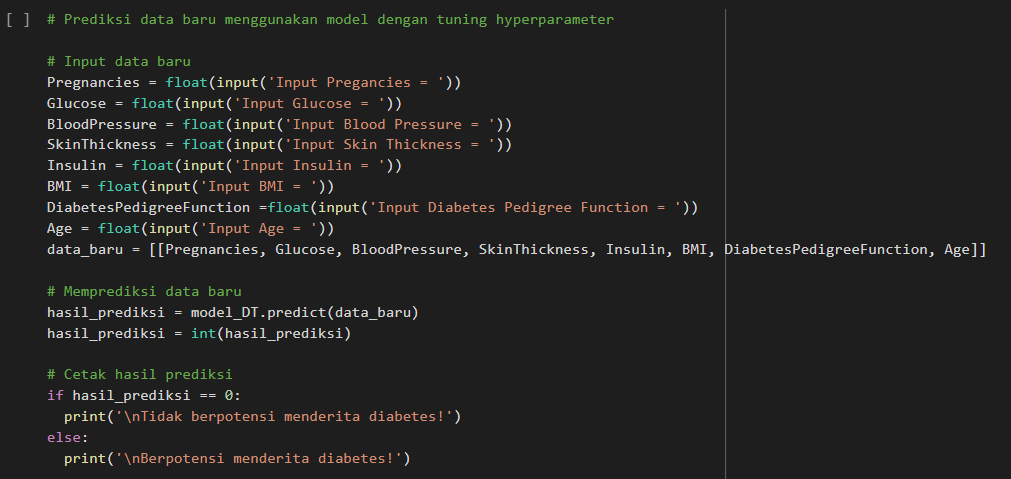

# Exercise (Latihan)

Lakukan pemodelan ulang menggunakan dataset yang sama!
1. Gunakan algoritma Decision Tree
2. Pilih 4 dari 8 feature yang tersedia
3. Lakukan tuning hyperparameter hingga mendapat model dengan performa terbaik
4. Generate tree model
5. Buat kesimpulan dari activity yang sudah dilakukan

In [ ]:
features = ['Glucose', 'BMI', 'Age', 'Pregnancies']
X = df[features].values
Y = df.Outcome

x_train, x_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
model_def = DecisionTreeClassifier()
model_def = model_default.fit(x_train, Y_train)

model_Dt = DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=4, random_state=25)
model_Dt = model_Dt.fit(x_train, Y_train)

In [ ]:
Y_pred_train_default = model_def.predict(x_train)

Y_pred_default = model_def.predict(x_test)

print("Train Accuracy :", metrics.accuracy_score(Y_train, Y_pred_train_default))
print("Train Precission :", metrics.accuracy_score(Y_train, Y_pred_train_default))
print("Train Recall :", metrics.accuracy_score(Y_train, Y_pred_train_default), '\n')

print("Test Accuracy :",metrics.accuracy_score(Y_test, Y_pred_default))
print("Test Precission :", metrics.accuracy_score(Y_test, Y_pred_default))
print("Test Recall :",metrics.accuracy_score(Y_test, Y_pred_default))

In [ ]:
Y_pred_train = model_Dt.predict(x_train)

Y_pred = model_Dt.predict(x_test)

print("Train Accuracy :", metrics.accuracy_score(Y_train, Y_pred_train))
print("Train Precission :", metrics.accuracy_score(Y_train, Y_pred_train))
print("Train Recall :", metrics.accuracy_score(Y_train, Y_pred_train), '\n')

print("Test Accuracy :",metrics.accuracy_score(Y_test, Y_pred))
print("Test Precission :", metrics.accuracy_score(Y_test, Y_pred))
print("Test Recall :",metrics.accuracy_score(Y_test, Y_pred))

In [ ]:
nama_label= ['Tidak berpotensi diabetes', 'Berpotensi diabetes']

print('Classification Report Model dengan Hyperparameter Default:\n')
print(classification_report(Y_test, Y_pred_default, target_names=nama_label))

print('\n\nClassification Report Model dengan Tuning Hyperparameter:\n')
print(classification_report(Y_test, Y_pred, target_names=nama_label))

In [ ]:
# Hyperparameter Default
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

feature_cols = ['Glucose', 'BMI', 'Age', 'Pregnancies']
dot_data = StringIO()

export_graphviz(model_default,
out_file=dot_data,
filled=True,
rounded=True,
special_characters=True,
feature_names = feature_cols,
class_names=['0', '1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree_model_default.png')
Image(graph.create_png())

In [ ]:
# Turing Hyperparameter
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

feature_cols = ['Glucose', 'BMI', 'Age', 'Pregnancies']
dot_data = StringIO()
export_graphviz(model_DT,
out_file=dot_data,
filled=True,
rounded=True,
special_characters=True,
feature_names = feature_cols,
class_names=['0', '1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree_model_DT.png')
Image(graph.create_png())

In [ ]:
# Score Feature
importance = model_default.feature_importances_

for i, v in enumerate(importance):
    print('Feature: ',feature_cols[i], 'Score: ', v, '%')

plt.figure(figsize=(13, 7))
plt.bar([x for x in feature_cols], importance)
plt.show()

In [ ]:


Pregnancies = float(input('Input Pregnancies: '))
Glucose = float(input('Input Glucose: '))
BMI = float(input('Input BMI: '))
Age = float(input('Input Age: '))
data_baru = [[Pregnancies, Glucose, BMI, Age]]

hasil_prediksi = model_Dt.predict(data_baru)
hasil_prediksi = int(hasil_prediksi[0])

if hasil_prediksi == 0:
    print("\nTidak berpotensi menderita diabetes!")
else:
    print("\nBerpotensi menderita diabetes!")